# Phase 3 Machine Learning Project- SYRIATEL CUSTOMER CHURN


- Student : Spencer Lugalia
- Student Pace : DSPT08
- Instructor: Samuel Karu, Daniel Ekale

## 1. Business understanding

The dataset pertains to SyriaTel telecommunications company seeking to understand and reduce customer churn. Churn, defined as customers leaving the service, significantly impacts revenue and profitability. Key business objectives include identifying factors contributing to churn, such as call usage patterns, subscription plans, and customer interactions, to predict at-risk customers. This analysis aims to uncover actionable insights to improve customer retention strategies, enhance service offerings, and focus on critical features like international plan subscriptions, daytime call usage, and customer service interactions to reduce churn rates and improve customer satisfaction.

### 1.1 Business problem

SyriaTel communication company is in need of a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Detecting customers who are likely to leave and putting retention plans in place to keep them are the primary business challenges. The company wants to reduce revenue loss by lowering turnover of customers.

### 1.2 The scope

The scope of the project include:

- Establishing if there are any predictable patterns whether a customer will ("soon") stop doing business with SyriaTel.

- Develop a predictive model to determine whether a customer will churn (binary classification: Yes/No) based on customer usage patterns, interaction with the company, and plan features.

- Provide actionable insights to SyriaTel to reduce customer churn by identifying high-risk customers and enabling targeted retention strategies.  

### 1.3 Data Source

The Churn in Telecom's dataset was sourced from [Churn Data](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

## 2 Data Understanding

Data understanding lets us explore and analyze our churn data to gain insights into its structure, content, and relationships.
It involves looking at the types of data, identifying patterns, checking for missing values, and understanding the distribution of variables.

In [421]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


##### Load dataset

In [422]:
# Read data from csv file,Checking the first 5 rows.
data = pd.read_csv('./Data/bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [423]:
#Checking the different columns info includig dtype and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- The data has 0 null values
- The data has various data types ranging from Object,integers, Floats and Booleans
- The structure of the data is 21 columns and 3333 entries

In [424]:
# checking on all the column names
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Columns overview

1. **state**: The state in which the customer resides.
2. **account length**: The duration (in months) the customer has had an account with the service provider.
3. **area code**: The area code associated with the customer's phone number.
4. **phone number**: The customer's phone number.
5. **international plan**: A binary indicator (yes/no) of whether the customer has an international calling plan.
6. **voice mail plan**: A binary indicator (yes/no) of whether the customer has a voicemail plan.
7. **number vmail messages**: The total number of voicemail messages received by the customer.
8. **total day minutes**: The total number of minutes the customer spent on daytime calls.
9. **total day calls**: The total number of daytime calls made by the customer.
10. **total day charge**: The total charge for daytime calls made by the customer.
11. **total eve minutes**: The total number of minutes the customer spent on evening calls.
12. **total eve calls**: The total number of evening calls made by the customer.
13. **total eve charge**: The total charge for evening calls made by the customer.
14. **total night minutes**: The total number of minutes the customer spent on nighttime calls.
15. **total night calls**: The total number of nighttime calls made by the customer.
16. **total night charge**: The total charge for nighttime calls made by the customer.
17. **total intl minutes**: The total number of minutes the customer spent on international calls.
18. **total intl calls**: The total number of international calls made by the customer.
19. **total intl charge**: The total charge for international calls made by the customer.
20. **customer service calls**: The total number of calls the customer made to customer service.
21. **churn**: A binary indicator (1/0) representing whether the customer has churned (left the service) or not.

In [425]:
# Descriptive statistics for the numerical columns in the dataset
data.describe().T


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [426]:
#checking the shape of the data
data.shape
print(f"This data set consists of {data.shape[0]} rows")
print(f"This data set consists of {data.shape[1]} columns")

This data set consists of 3333 rows
This data set consists of 21 columns


In [427]:
# Confirming there are no Null values
data.isnull().values.any()

False

In [428]:
# Checking the total number of duplicated rows
data.duplicated().sum()
print(f"This data set consists of duplicated {data.duplicated().sum()} rows")

This data set consists of duplicated 0 rows


### 2.1 Data Cleaning and Feature Engineering

At this point we have already established that there is 0 null and 0 duplicated rows therefore we will not have to fill null values or drop duplicated rows.

Therefore for this section i will do the following tasks:
- For the model drop non critical columns
- One-Hot Encode the 3 categorical columns 'international plan', 'voice mail plan' and 'state' to numerical.
- Check for, and remove outliers

In [429]:
# drop unimportant columns
data = data.drop(columns=['phone number','area code'],axis=1)

# Confirm columns are dropped
data.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [430]:
# OneHotCode the three categorical columns of interest

data = pd.get_dummies(data, columns=['international plan','voice mail plan','state'],drop_first=True)

# Convert the one-hot encoded columns and the target colum 'Churn' from boolean to integer 
for col in data.columns: 
    if data[col].dtype == 'bool':
          data[col] = data[col].astype(int) 
        
data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [431]:
# Preview the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [432]:
def remove_outliers(data, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in data.columns if col != 'Churn' and data[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df = remove_outliers(data, feature_columns)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0


### 2.2 Exploratory Data Analysis

In [433]:
# create a copy of the clean dataframe
df=df.copy(deep=True)

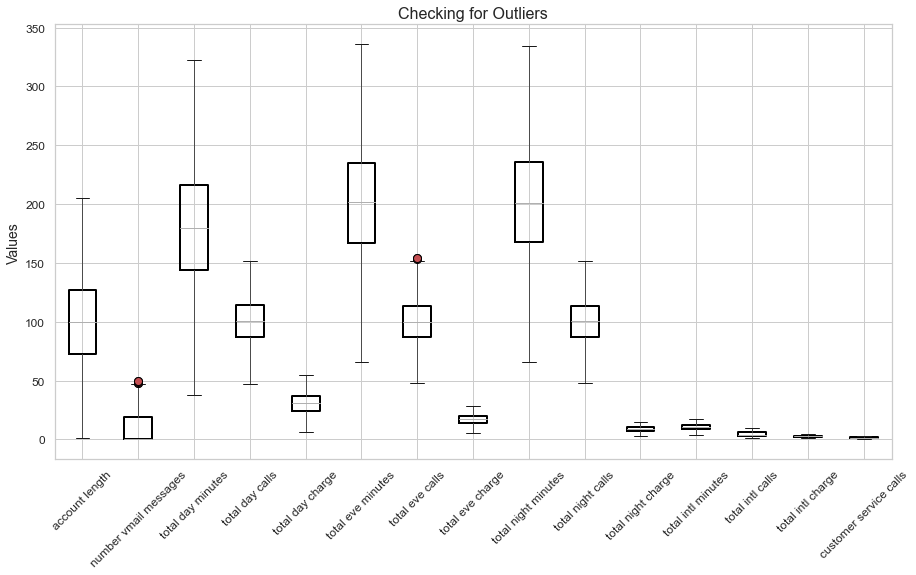

In [434]:

# Define a function to plot boxplots for cleaned columns
def plot_boxplots(df, columns):
    plt.figure(figsize=(15,8))  # Increase the figure size for better clarity
    df[columns].boxplot(boxprops=dict(linewidth=2), flierprops=dict(markerfacecolor='r', marker='o', markersize=8, linestyle='none'))  # Customize the outlier markers
    plt.title('Checking for Outliers', fontsize=16)  # Add a more descriptive title
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)  # Adjust y-axis label size for consistency
    plt.grid(True)  # Add a grid for better visual reference
    plt.savefig('outliears')
    plt.show()

plot_boxplots(df, feature_columns)


#### 2.2.1 Correlation Matrix


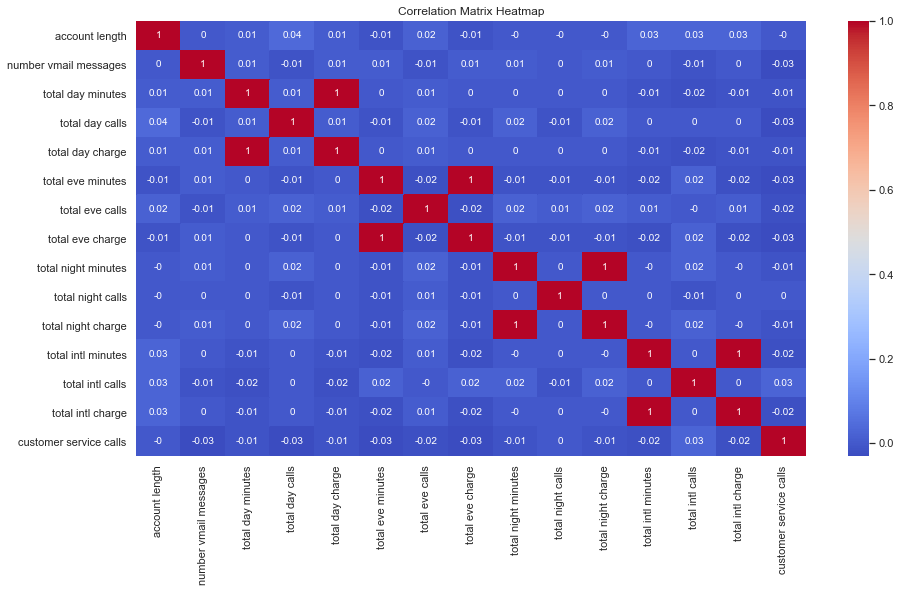

In [435]:
# Calculate the correlation matrix
corr_matrix_columns = df[['account length', 
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', ]]
corr_matrix = corr_matrix_columns.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()


  
+ Proposed remedy is to drop one of the correlated predictors from the model as seen above in the heatmap there is clear correlation with an expectation of an impact on model perfomance and interepretability due to multicollinearity. There is a possibility of overfitting the model.

### 2.2.2 Histograms

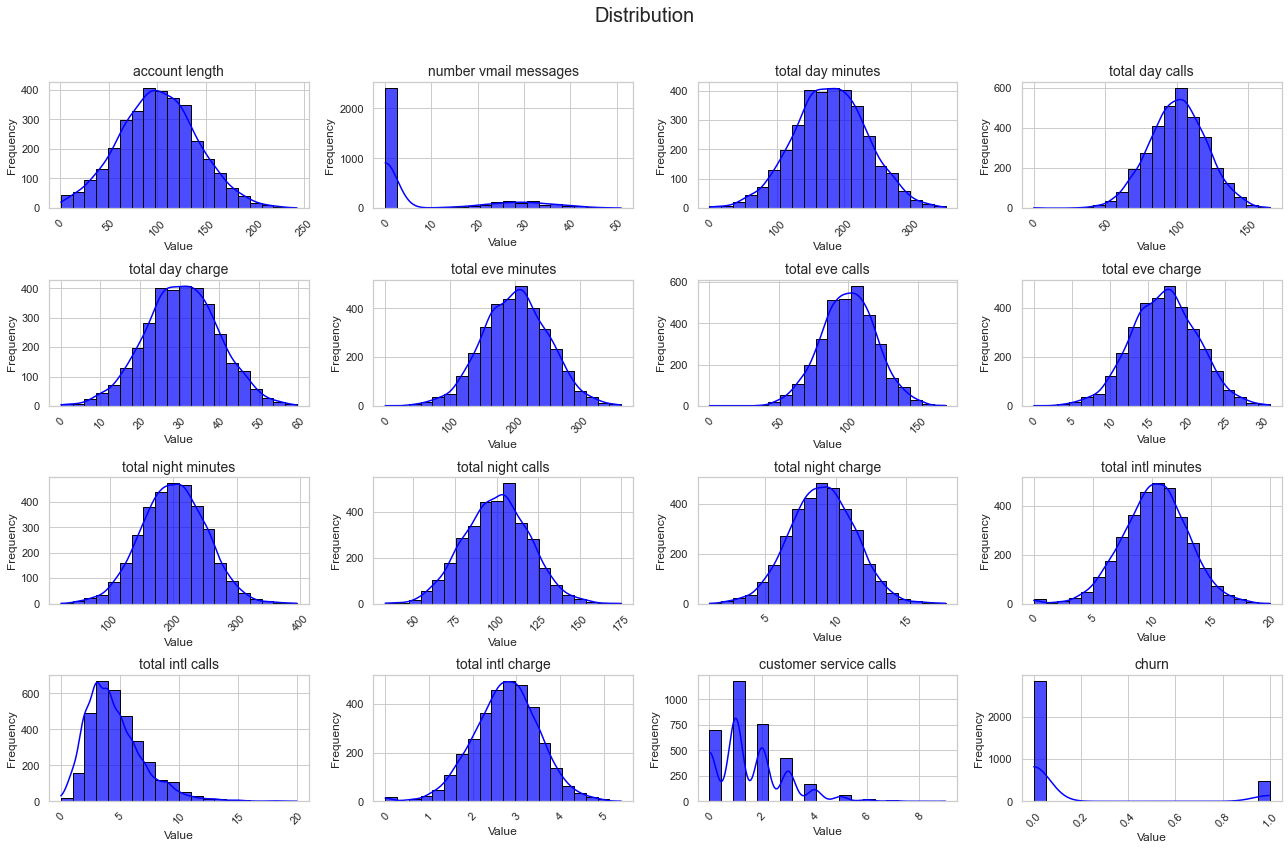

In [436]:
# List of continuous columns to plot
continuous_cols = df[['account length', 
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn']]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 12))  # Adjusted figure size for better clarity
fig.suptitle('Distribution', fontsize=20)  

for i, col in enumerate(continuous_cols):
    ax = axes.flatten()[i]
    sns.histplot(data[col], bins=20, kde=True, color='blue', alpha=0.7, edgecolor='black', ax=ax)
    ax.set_title(col, fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the super title
plt.savefig('Distribution')
plt.show()


- The charts show that the number of calls and charges for local calls are approximately normally distributed.
- The Customer Service Calls show distinct peaks at 1,2, indicating that these values are more frequent.
-  Number of Voice Mail Messages is highly skewed to the right, with most values concentrated around 0 and a few concentrated at 20 - 40. Attributed to the service being an opt in service.


#### 2.2.3 Class distribution of the target variable

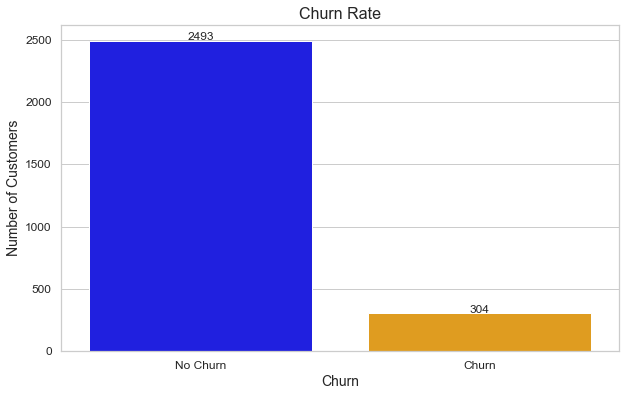

In [437]:
# Count the values of the churn column
churn_count = df['churn'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=churn_count.index, y=churn_count.values, palette=["blue", "orange"])

# Add titles and labels
plt.title('Churn Rate', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], fontsize=12)
plt.yticks(fontsize=12)

# Display the count values on top of the bars
for i, count in enumerate(churn_count.values):
    ax.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.savefig('Churn_Rate')

plt.show()



From the above plot we can clearly come to a conclusion that there is a significant class imbalance. Therefore a significant impact on reliability of the model.

## 3.0 Modeling 

I'll use a model iteration strategy in this part that takes advantage of feature importance and hyperparameter adjustment to address class imbalance.

### 3.1 Data Preparation

In [438]:
# In order to standardise the range of features to ensure they all contribute equally to the model's performance we will perform scaling
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.622549,0.50,0.798455,0.600000,0.798430,0.486667,0.481132,0.486710,0.665428,0.413462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.519608,0.52,0.435042,0.723810,0.434944,0.479630,0.518868,0.479739,0.701487,0.528846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.666667,0.00,0.722261,0.638095,0.722222,0.204444,0.584906,0.204357,0.360223,0.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.362745,0.00,0.452949,0.628571,0.452912,0.304815,0.698113,0.305011,0.450558,0.701923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.573529,0.00,0.652037,0.485714,0.652003,0.572593,0.500000,0.572549,0.513755,0.673077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Remove Correlated Columns

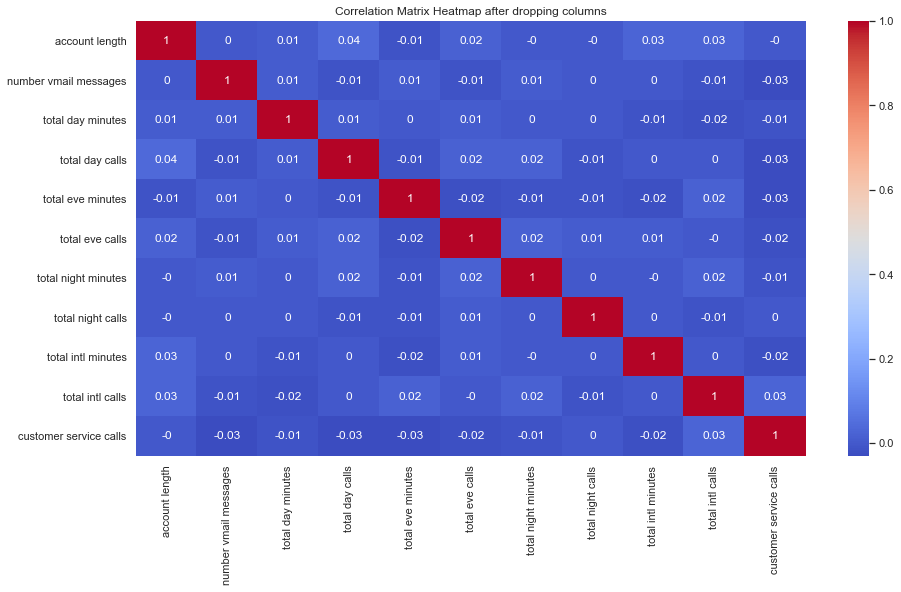

In [439]:
# Calculate the correlation matrix to remove multicollinearity
corr_matrix = df[['account length', 'number vmail messages', 'total day minutes', 'total day calls',
        'total eve minutes', 'total eve calls',
        'total night minutes', 'total night calls',
        'total intl minutes', 'total intl calls',
        'customer service calls']]
corr_matrix = corr_matrix.corr().round(2)
corr_df = corr_matrix

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap after dropping columns')
plt.savefig('Correlation_Matrix_Heatmap')
plt.show()

### 3.2 Standardize the feature columns

In [440]:

# predictors and Target represented by X and y

X = df.drop(columns=['churn','number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 
                        'total intl charge'],axis=1)
y = df['churn']

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Intitialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data 
X_train_standardized = scaler.fit_transform(X_train) 
X_test_standardized = scaler.transform(X_test)

# Retain feature names and convert back to DataFrame
X_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_standardized,columns=X_test.columns)

In [441]:
# Check the shape of the standardized X_datasets
print(f"The y_train data set consists of {y_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[1]} columns\n")

print(f"The y_test data set consists of {y_test.shape[0]} rows")
print(f"The X_test data set consists of {X_test.shape[0]} rows")
print(f"The X_train data set consists of {X_test.shape[1]} columns")

The y_train data set consists of 2097 rows
The X_train data set consists of 2097 rows
The X_train data set consists of 62 columns

The y_test data set consists of 700 rows
The X_test data set consists of 700 rows
The X_train data set consists of 62 columns


Both the training and test features have been standardized in order to make the model training and evaluation more reliable and effective. The two data sets have a 75.25 split.

### 3.3 Baseline Logistic Regression Model

Training Accuracy: 0.64
Test Accuracy: 0.57
Train AUC: 0.89
Test AUC: 0.82


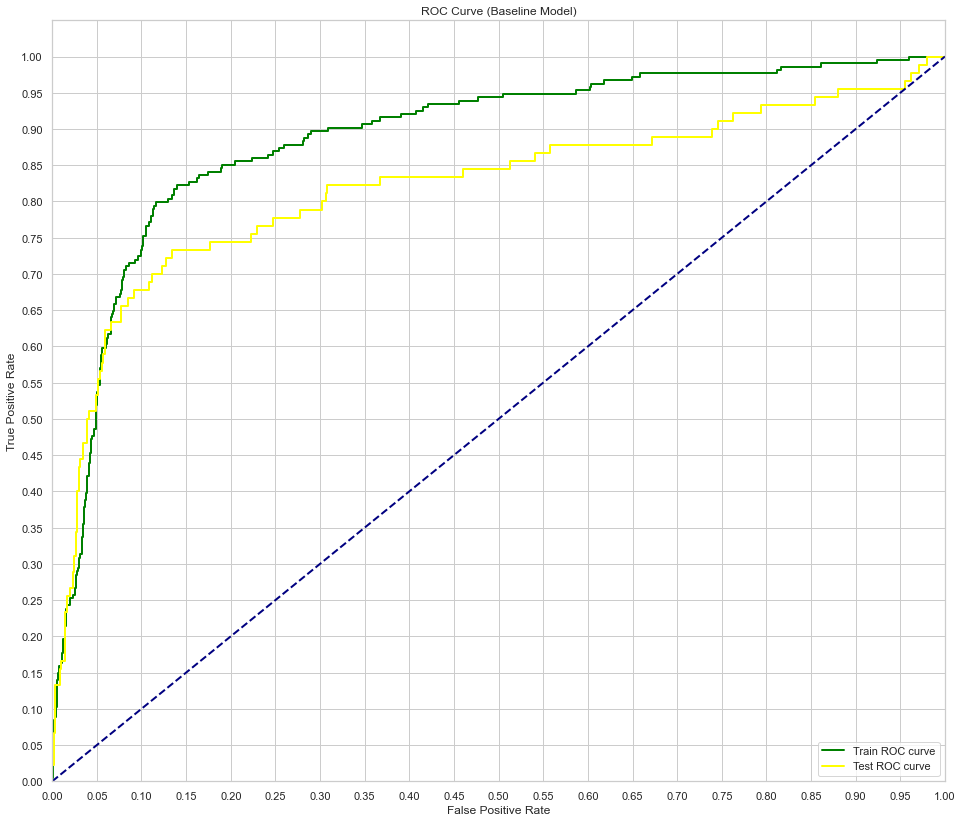

In [442]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12)

# Fit to training data
base_log_model = logreg.fit(X_train, y_train)

# Predict on train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# Get Accuracy Score 
print('Training Accuracy:', round(accuracy_score(y_train, y_hat_train), 2))
print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 2))

# Create the ROC Curve for both the train and test sets

# Calculate the probability scores of each point for the train and test sets
y_train_score = base_log_model.decision_function(X_train)
y_test_score = base_log_model.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the train and test sets
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)

# Print the AUC for the train and test sets
print('Train AUC: {:.2f}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {:.2f}'.format(auc(test_fpr, test_tpr)))

# Plot the ROC curves for the train and test sets
plt.figure(figsize=(16,14))
lw = 2

plt.plot(train_fpr, train_tpr, color='green', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='yellow', lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy',  lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Baseline Model)')
plt.legend(loc='lower right')
plt.show()


**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
              precision    recall  f1-score   support

    No Churn       0.96      0.53      0.68       610
       Churn       0.21      0.84      0.34        90

    accuracy                           0.57       700
   macro avg       0.58      0.69      0.51       700
weighted avg       0.86      0.57      0.64       700



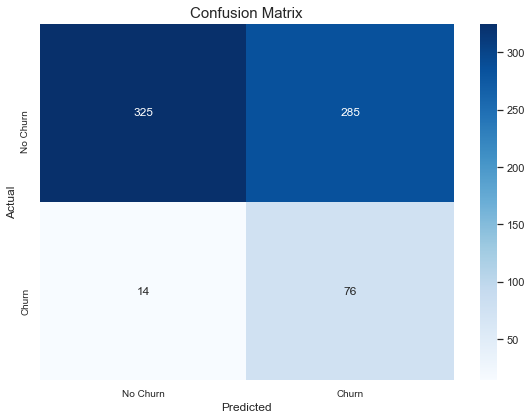

In [443]:
# Generate predictions using baseline_model and X_train
y_pred = logreg.predict(X_test)

# Ensure the length of y_test and y_pred are consistent
if len(y_test) != len(y_pred):
    raise ValueError(f"Inconsistent number of samples: y_test has {len(y_test)} samples, but y_pred has {len(y_pred)} samples.")

# Print classification metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size for better clarity
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



The confusion matrix above indicates the perfomance of the model as below:
- True positive; There are 76 instances of the churn being correctly predicted as "Churn"
- True Negative; There are 325 instances of the churn correctly prediced as "No Churn"
- False Positive; There are 285 instances of the churn being predicted as "Churn" where its actually "No Churn"
- False Negative; There are 14 instances of the churn being predicted as "No Churn" where its actually "Churn"

Overall, the model does a good job of detecting "No Churn" cases, but it has a lot of struggle detecting "Churn," as shown by the large amount of false negatives. This implies that there may be an imbalance in the dataset or that the model's sensitivity to the "Churn" class should be improved.

In [444]:
# Calculate and print key metrics
print("**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** LOGISTIC REGRESSION CLASSIFIER MODEL RESULTS ****************
Accuracy: 0.57286
Precision: 0.21053
Recall: 0.84444
F1 Score: 0.33703


The Logistics Regressionmodel performance metrics are as follows:

- Accuracy ( 0.57286): The model accurately predicted 57% of all instances.
- Precision (0.21053): Of the cases predicted as "Churn," 21% were correct.
- Recall (0.84444): The model successfully identified only 84% of the actual "Churn" cases.
- F1 Score (0.33703): The low F1 score reflects poor overall performance in detecting "Churn," balancing both precision and recall.

These metrics are particularly useful for imbalanced datasets, as Accuracy alone may not reflect the model's ability to correctly identify the minority class ("Churn"). In this case, the metrics will highlight that while the model performs well in predicting "No Churn," it has lower Recall and F1 Score for "Churn," indicating room for improvement in recognizing this minority class.

### 3.4 Random Forest model

In [445]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_sampled, y_sampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("**************** RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

**************** RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.91143
Precision: 0.72581
Recall: 0.50000
F1 Score: 0.59211


The Random Forest model which has SMOTE applied to it clearly outperforms the Logistic Regression baseline in all metrics. While Logistic Regression shows acceptable accuracy, its poor recall and F1 score highlight its inability to effectively detect "Churn." In contrast, Random Forest demonstrates strong performance across all metrics, making it a much better choice for this problem, especially if identifying "Churn" is critical.

In [446]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_sampled, y_sampled = smote.fit_resample(X_train, y_train)

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_sampled, y_sampled)

# Best hyperparameters and model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the tuned model
print("**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.6min finished


Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
**************** TUNED RANDOM FOREST CLASSIFIER RESULTS ****************
Accuracy: 0.90571
Precision: 0.73077
Recall: 0.42222
F1 Score: 0.53521


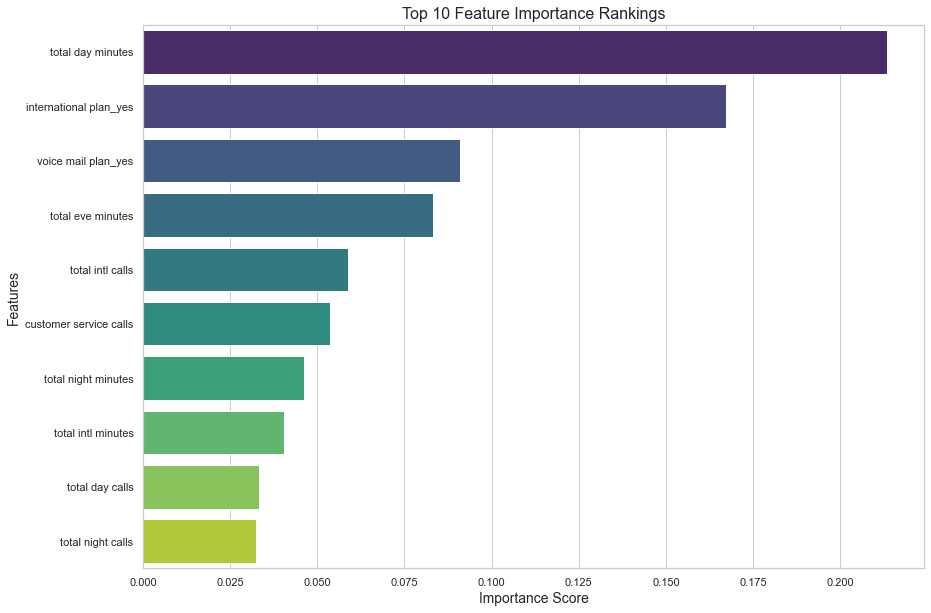

In [447]:

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance and select the top 10 features
top_features_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 features
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette="viridis")

# Add title and labels
plt.title('Top 10 Feature Importance Rankings', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot & Save the plot
plt.savefig('Top_10_Feature_importance_Rankings')
plt.show()


### 3.5 Decision Tree

In [448]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter space for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],            # Splitting criterion
    'max_depth': [None, 10, 20, 30, 50],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],         # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],           # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],      # Number of features to consider for the best split
    'splitter': ['best', 'random']               # Strategy for choosing the split at each node
}

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt, 
    param_distributions=param_dist, 
    n_iter=100,               # Number of parameter settings sampled
    scoring='f1',             # Use F1 score to evaluate performance
    cv=5,                     # 5-fold cross-validation
    random_state=42,          # Ensures reproducibility
    verbose=2,
    n_jobs=-1                 # Use all available processors
)
random_search.fit(X_resampled, y_resampled)

# Best hyperparameters and model
best_dt = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Make predictions with the best model
y_pred = best_dt.predict(X_test)

# Step 7: Evaluate the tuned model
print("**************** TUNED DECISION TREE RESULTS ****************")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
print(f"Precision: {precision_score(y_test, y_pred):.5f}")
print(f"Recall: {recall_score(y_test, y_pred):.5f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:    2.0s remaining:    0.0s


Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'entropy'}
**************** TUNED DECISION TREE RESULTS ****************
Accuracy: 0.89571
Precision: 0.58416
Recall: 0.65556
F1 Score: 0.61780


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.1s finished


The Decision Tree has lower accuracy and precision compared to Random Forest, with a higher recall. It’s prone to overfitting due to its single tree structure, which could explain the imbalance between precision and recall.
The Random Forest performs well across all metrics, with high accuracy and reasonable precision and recall. Its ensemble nature (using multiple trees) helps in reducing overfitting and improving stability.

*************** MODEL COMPARISON RESULTS ***************
Training Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.888664  0.925608
1  RandomForestClassifier  1.000000  1.000000
2  DecisionTreeClassifier  1.000000  1.000000

Best Model on Training Data: RandomForestClassifier (AUC: 1.000, Accuracy: 1.000)

Test Data:
              classifiers       auc  accuracy
0      LogisticRegression  0.814517  0.905714
1  RandomForestClassifier  0.852122  0.912857
2  DecisionTreeClassifier  0.782605  0.910000

Best Model on Test Data: RandomForestClassifier (AUC: 0.852, Accuracy: 0.913)


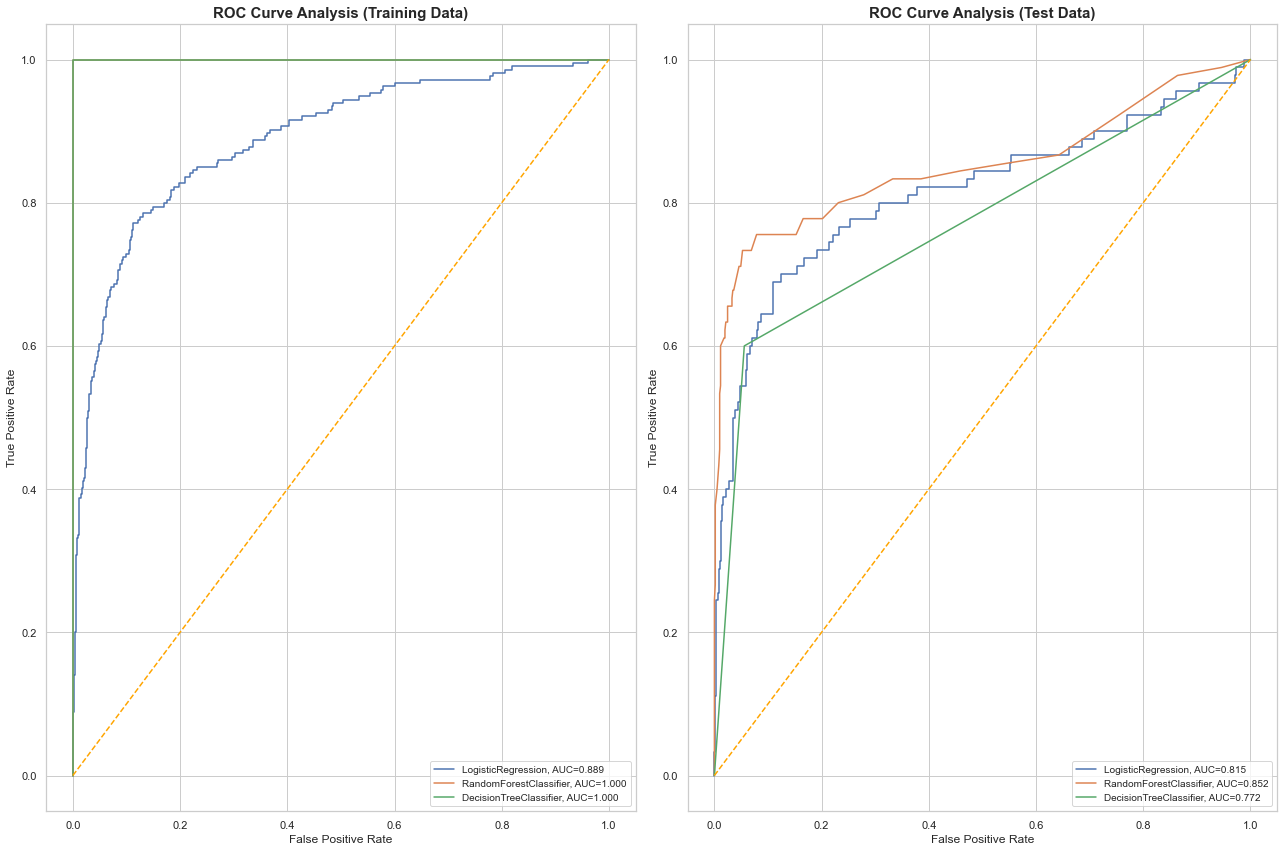

In [449]:
# Define classifiers
classifiers = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for Logistic Regression
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

# Define result tables for training and test data
train_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])
test_result_table = pd.DataFrame(columns=['classifiers', 'auc', 'accuracy'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

    # Training data predictions
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_train_pred = model.predict(X_train)
    train_auc = roc_auc_score(y_train, y_train_proba)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test data predictions
    y_test_proba = model.predict_proba(X_test)[:, 1]
    y_test_pred = model.predict(X_test)
    test_auc = roc_auc_score(y_test, y_test_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append results for training and test data
    train_result_table = pd.concat([train_result_table, 
                                     pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                   'auc': [train_auc], 
                                                   'accuracy': [train_accuracy]})], 
                                    ignore_index=True)
    test_result_table = pd.concat([test_result_table, 
                                    pd.DataFrame({'classifiers': [cls.__class__.__name__], 
                                                  'auc': [test_auc], 
                                                  'accuracy': [test_accuracy]})], 
                                   ignore_index=True)

# Identify the best model for training and test data
best_train_model = train_result_table.loc[train_result_table['auc'].idxmax()]
best_test_model = test_result_table.loc[test_result_table['auc'].idxmax()]

# Display comparison results
print("*************** MODEL COMPARISON RESULTS ***************")
print("Training Data:")
print(train_result_table)
print("\nBest Model on Training Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_train_model['classifiers'], best_train_model['auc'], best_train_model['accuracy']))

print("\nTest Data:")
print(test_result_table)
print("\nBest Model on Test Data: {} (AUC: {:.3f}, Accuracy: {:.3f})".format(
    best_test_model['classifiers'], best_test_model['auc'], best_test_model['accuracy']))

# Plot ROC curves for training and test data
plt.figure(figsize=(18, 12))

# Training ROC curves
plt.subplot(1, 2, 1)
plt.title('ROC Curve Analysis (Training Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_train_proba)
    auc = roc_auc_score(y_train, y_train_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

# Test ROC curves
plt.subplot(1, 2, 2)
plt.title('ROC Curve Analysis (Test Data)', fontweight='bold', fontsize=15)
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc = roc_auc_score(y_test, y_test_proba)
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(cls.__class__.__name__, auc))
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(prop={'size': 10}, loc='lower right')

plt.tight_layout()
plt.savefig('Roc_Curve_Training_and_Test_Data')
plt.show()


Of the models based on their AUC and accuracy scores for both training and test data we can conclude as follows; 

- Accuracy is a measure of how often the model gets the prediction right, and in this case measures how often the model correctly predicts whether a customer will churn or not. An test accuracy score of 0.91 from the best Random Forest Ensemble Model means that our model was able to predict correctly 91% of the time. 
- Random Forest and Decision Tree models have perfect accuracy and AUC scores of 1.000, suggesting they fit the training data perfectly. However, this could indicate overfitting, as these models may have memorized the training data rather than generalizing well.
- When evaluated on the test data, the Random Forest classifier stands out with the highest AUC (0.863270) and accuracy (92%). It outperforms the other two models, indicating better generalization and performance on unseen data. The Decision Tree model has a relatively high accuracy but a lower AUC, suggesting it may not handle the complexity of the data as well as Random Forest. Logistic Regression also has a lower AUC and accuracy compared to Random Forest.

**Conclusion:** The Random Forest classifier is the best model to use, as it achieves the highest accuracy and AUC on both training and test data, with the best generalization capability to unseen data.

## Recomendation and proposed customer retention strategies

- Focus on the most impactful features identified above to reduce the complexity of the model and make it more effective and effecient.
- Provide targeted offers and discounts to customers based on their patterns and preferences enhancing retention.
- Analyze customer service interaction to identify common ailing issues to the customers and address each promptly.
- address any issue that may hinder experience enhancement.